In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS

In [3]:
df=pd.read_csv("SMSSpamCollection",sep='\t',names=['target','message'])
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
print("the number of rows :",df.shape[0])
print("the number of columns :",df.shape[1])

the number of rows : 5572
the number of columns : 2


In [6]:
df.describe(include='all')

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

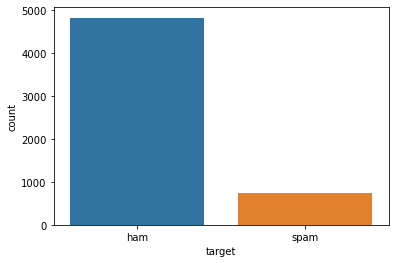

In [8]:
sns.countplot(x='target', data=df)

In [11]:
sdf = df.loc[df['target']=='spam', :]
sdf.head()

,target,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [12]:
sdf['target'].value_counts()

spam    747
Name: target, dtype: int64

In [13]:

words = ' '.join(df['message'])

print(words)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitl

In [16]:
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and word!=STOPWORDS
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

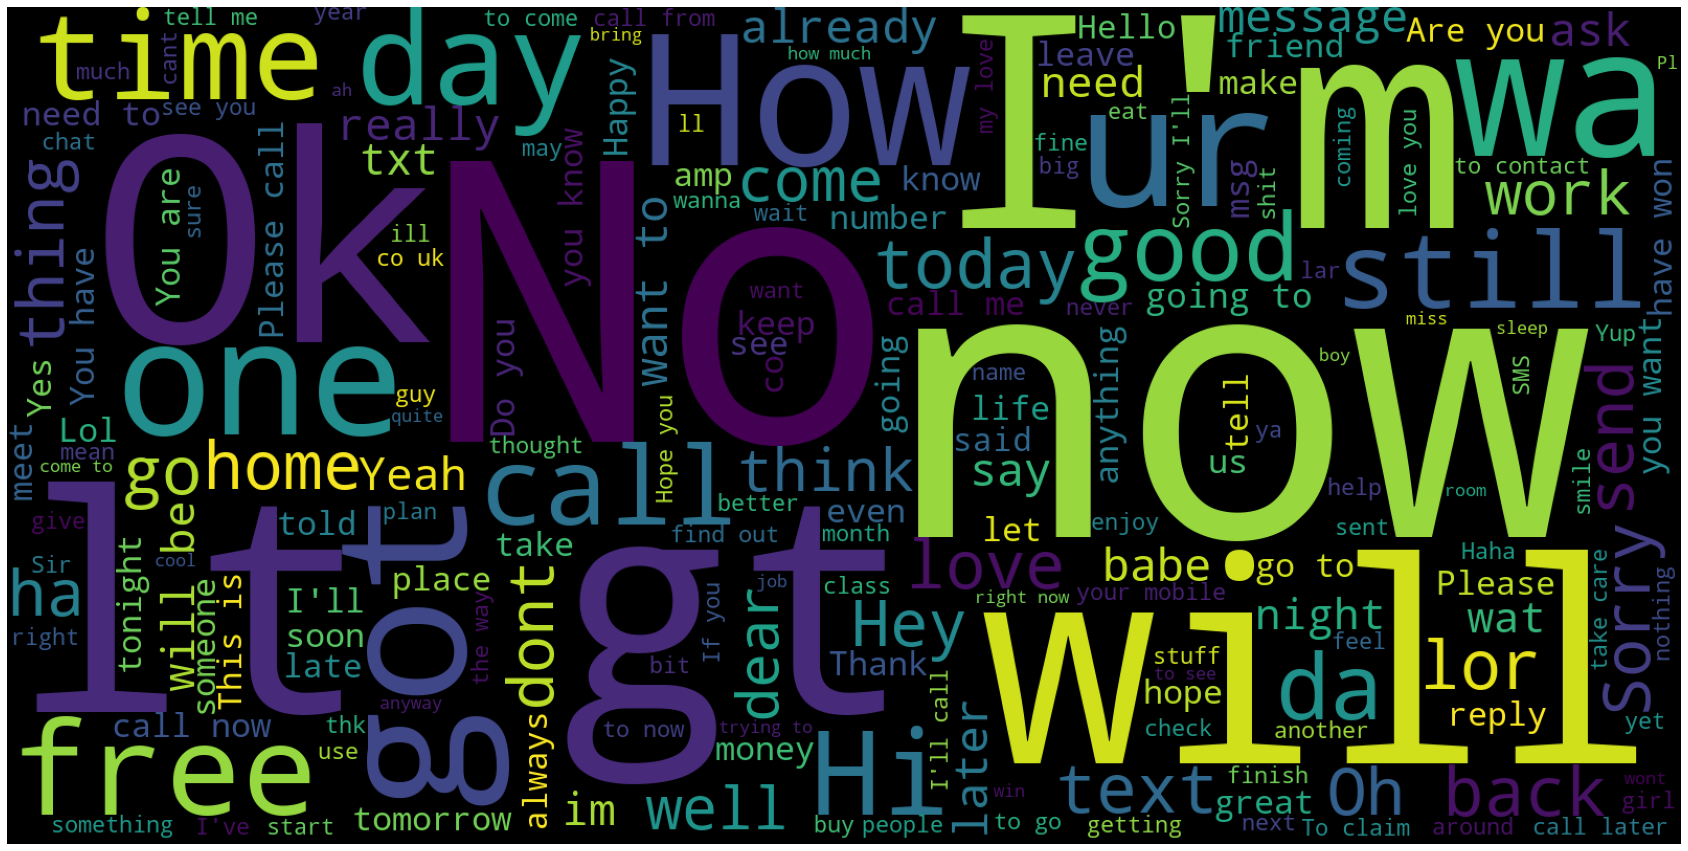

In [17]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [19]:
stemmer = PorterStemmer()

In [20]:
lemmatizer = WordNetLemmatizer()

In [21]:

clean_spam_lst = []

spam_len_lst = []

In [22]:
def preprocess(raw_spam, flag):
    # Removing special characters and digits :
    letters_only = re.sub("[^a-zA-Z]", " ",raw_spam)
    
    # change sentence to lower case :
    letters_only = letters_only.lower()

    # tokenize into words :
    words = letters_only.split()
    
    # remove stop words :               
    words = [w for w in words if not w in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_spam_lst.append(" ".join(words))
    
    spam_len_lst.append(len(words))


In [24]:
clean_spam_lst = []

spam_len_lst = []

df['message'].apply(lambda x: preprocess(x, 'stem'))

# adding 2 columns in Dataframe :

df['clean_spam_stem'] = clean_spam_lst

df['spam_length_stem'] = spam_len_lst

In [25]:
clean_spam_lst = []

spam_len_lst = []

df['message'].apply(lambda x: preprocess(x, 'lemma'))

# adding 2 columns in Dataframe :

df['clean_spam_lema'] = clean_spam_lst

df['spam_length_lema'] = spam_len_lst

In [26]:
df.head()

,target,message,clean_spam_stem,spam_length_stem,clean_spam_lema,spam_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7


In [28]:
df['type']=df['target'].apply(lambda x: 0 if x=='spam' else 1)
df.head()

,target,message,clean_spam_stem,spam_length_stem,clean_spam_lema,spam_length_lema,type
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16,1
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6,ok lar joking wif u oni,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21,0
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,7,nah think go usf life around though,7,1


In [30]:
from sklearn.model_selection  import train_test_split

train, test = train_test_split(df,test_size=0.2,random_state=42)

In [31]:
train_clean_spam=[]

for msg in train['clean_spam_stem']:
    train_clean_spam.append(msg)

test_clean_spam=[]

for msg in test['clean_spam_stem']:
    test_clean_spam.append(msg)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorizing of Train and Test data :

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_spam)

test_features = vectorizer.transform(test_clean_spam)

In [34]:
vectorizer.vocabulary_

{'repli': 3969,
 'win': 5387,
 'weekli': 5323,
 'fifa': 1661,
 'world': 5452,
 'cup': 1082,
 'held': 2114,
 'send': 4196,
 'stop': 4586,
 'end': 1461,
 'servic': 4213,
 'hello': 2118,
 'sort': 4461,
 'town': 4980,
 'alreadi': 147,
 'dont': 1314,
 'rush': 4069,
 'home': 2171,
 'eat': 1403,
 'nacho': 3145,
 'let': 2680,
 'know': 2577,
 'eta': 1512,
 'come': 931,
 'guoyang': 2032,
 'go': 1930,
 'tell': 4784,
 'told': 4934,
 'hey': 2130,
 'sathya': 4122,
 'till': 4897,
 'dint': 1255,
 'meet': 2934,
 'even': 1523,
 'singl': 4330,
 'time': 4898,
 'saw': 4131,
 'situat': 4342,
 'orang': 3389,
 'bring': 619,
 'rington': 4019,
 'chart': 793,
 'hero': 2127,
 'free': 1779,
 'hit': 2144,
 'week': 5321,
 'pic': 3571,
 'wap': 5279,
 'receiv': 3911,
 'tip': 4900,
 'sit': 4337,
 'mu': 3107,
 'wait': 5261,
 'everyon': 1531,
 'get': 1890,
 'suit': 4652,
 'take': 4736,
 'shower': 4290,
 'finish': 1680,
 'liao': 2684,
 'urgent': 5146,
 'mobil': 3034,
 'award': 353,
 'bonu': 563,
 'caller': 702,
 'prize': 

In [35]:

# importing required libraries :

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

In [36]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]

########################################LogisticRegression########################################

-> Accuracy of LogisticRegression is 98.39%

-> CONFUSION METRIC :
[[965   1]
 [ 17 132]]

-> HEAT MAP :


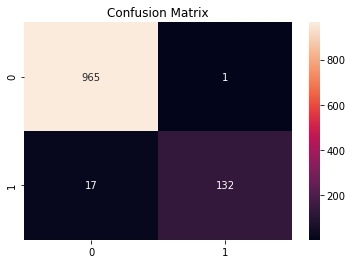


-> CLASSIFICATION REPORT :
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

########################################DecisionTreeClassifier########################################

-> Accuracy of DecisionTreeClassifier is 97.76%

-> CONFUSION METRIC :
[[960   6]
 [ 19 130]]

-> HEAT MAP :


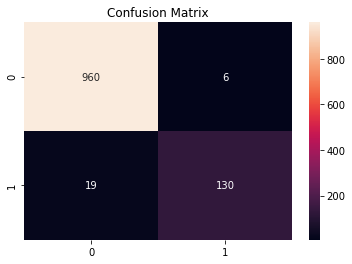


-> CLASSIFICATION REPORT :
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       966
        spam       0.96      0.87      0.91       149

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

########################################SVC########################################

-> Accuracy of SVC is 98.39%

-> CONFUSION METRIC :
[[966   0]
 [ 18 131]]

-> HEAT MAP :


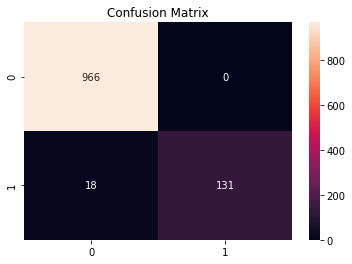


-> CLASSIFICATION REPORT :
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       1.00      0.88      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [39]:
dense_features = train_features.toarray() # for train data

dense_test = test_features.toarray()
for cls_ in Classifiers:
    
    fit = cls_.fit(dense_features,train['target'])
    
    # make predictions :
    
    pred = fit.predict(dense_test) 
    
    # calculating the accuray :
    
    accuracy = round((accuracy_score(pred,test['target'])*100),2) 
    
    print('#'*40+cls_.__class__.__name__+ '#'*40)
    
    print('\n-> Accuracy of '+cls_.__class__.__name__+' is '+str(accuracy)+'%')
    
    # confusion metric :
    
    print("\n-> CONFUSION METRIC :")
    
    con_metric = confusion_matrix(test['target'], pred)
    
    print(con_metric) 
    
    # heat map for particular confusion metric :
    
    print("\n-> HEAT MAP :")
    
    sns.heatmap(con_metric, annot=True, fmt='d')
    
    plt.title("Confusion Matrix")
    
    plt.show()
    
    # Classification report :
    
    print("\n-> CLASSIFICATION REPORT :")
    
    print(classification_report(test['target'],pred))